In [9]:
import pandas as pd
data = pd.read_csv("hidroquimicaEDACarasi.csv")
data.head()

,Nombre del punto,Este,Norte,Altitud,Zona,Datum,Año,Descripción de ubicación,Descripción de figura,Ruta de figura
0,P-1,306059,8312652,4854,19 Sur,WGS84,2017,Piezómetro ubicado en la parte baja del pad Je...,Sulfatada,http://visorsig.oefa.gob.pe/datos_DE/RF/01/HQ/...
1,SW-03,306983,8313172,4913,19 Sur,WGS84,2017,Filtración que descarga a la mampostería al ma...,Sultada sódica,http://visorsig.oefa.gob.pe/datos_DE/RF/01/HQ/...
2,EE-9,303000,8313787,4647,19 Sur,WGS84,2017,"Quebrada Azufrini, 300 m aguas arriba del tajo...",Sulfatada cálcica,http://visorsig.oefa.gob.pe/datos_DE/RF/01/HQ/...
3,SW-23,302754,8313670,4617,19 Sur,WGS84,2017,"Manantial, surgencia en rocas volcánicas.",Sulfatada magnésica,http://visorsig.oefa.gob.pe/datos_DE/RF/01/HQ/...
4,SW-24,302490,8313490,4612,19 Sur,WGS84,2017,Manantial a la altura del Tajo Carlos Alto.,Sulfatada cálcica,http://visorsig.oefa.gob.pe/datos_DE/RF/01/HQ/...


In [10]:
data2 = data[(data["Descripción de figura"] == "Sulfatada cálcica") & (data["Altitud"] < 4800)]
data2. head()

,Nombre del punto,Este,Norte,Altitud,Zona,Datum,Año,Descripción de ubicación,Descripción de figura,Ruta de figura
2,EE-9,303000,8313787,4647,19 Sur,WGS84,2017,"Quebrada Azufrini, 300 m aguas arriba del tajo...",Sulfatada cálcica,http://visorsig.oefa.gob.pe/datos_DE/RF/01/HQ/...
4,SW-24,302490,8313490,4612,19 Sur,WGS84,2017,Manantial a la altura del Tajo Carlos Alto.,Sulfatada cálcica,http://visorsig.oefa.gob.pe/datos_DE/RF/01/HQ/...
11,EW-1,301496,8312011,4563,19 Sur,WGS84,2017,"Quebrada sin nombre, ubicada al sureste del bo...",Sulfatada cálcica,http://visorsig.oefa.gob.pe/datos_DE/RF/01/HQ/...
12,EW-6,301584,8312566,4603,19 Sur,WGS84,2017,"Quebrada sin nombre que aporta a un bofedal, u...",Sulfatada cálcica,http://visorsig.oefa.gob.pe/datos_DE/RF/01/HQ/...
16,PZ-4,300494,8311696,4457,19 Sur,WGS84,2017,Piezómetro ubicado aguas abajo de la confluenc...,Sulfatada cálcica,http://visorsig.oefa.gob.pe/datos_DE/RF/01/HQ/...


In [11]:
!pip install fiona
!pip install geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

In [0]:
geometry = [Point(xy) for xy in zip(data2.Este, data2.Norte)]

In [0]:
crs = {"init":"epsg:32719"}

In [0]:
geo_df = GeoDataFrame(data2, geometry = geometry, crs=crs)

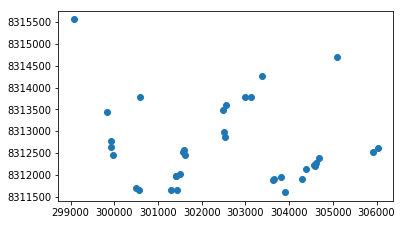

In [15]:
geo_df.plot()

In [0]:
geojson = geo_df.to_crs(epsg="4326").to_json()

In [17]:
import folium
mapa = folium.Map([-15.24,-70.85], zoom_start=12, tiles="Stamen Terrain") #condiciones del mapa
puntos = folium.features.GeoJson(geojson) #importamos los puntos(que estan en formato geojson)
mapa.add_children(puntos) #añadimos los puntos al mapa creado
mapa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.
